<img src="https://www.rp.edu.sg/images/default-source/default-album/rp-logo.png" width="200" alt="Republic Polytechnic"/>

[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/Ipomoeabatatas/ubts_day_02/blob/main/Agents/Activity_01_Answer.ipynb)

Credit: Notebook Adapted from course *Multi AI Agent Systems with crewAI - Deeplearning.ai*

```
# This is formatted as code
```



## Create Agents to Research and Write an Article

In this lesson, you will be introduced to the foundational concepts of multi-agent systems and get an overview of the crewAI framework.

### Getting Started.

This notebook is designed to work in Google Colab.
For secret and keys, it has to be stored and accessed via the Secrets feature.

**Create** a scret key OPENAI_API_KEY using the SECRET Features.

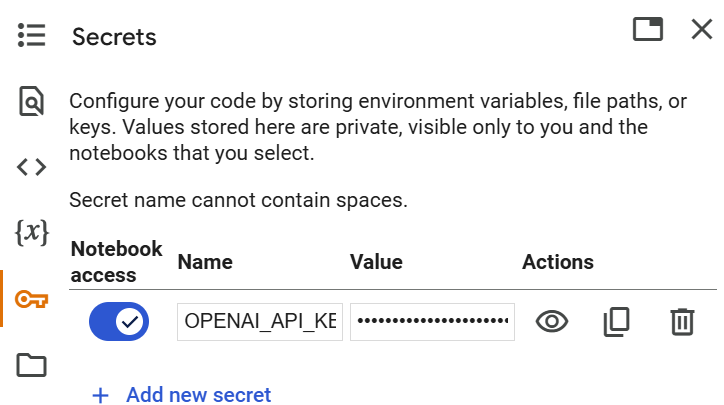




## Install the required projects


In [ ]:
!pip install crewai==0.108.0
!pip install crewai-tools==0.40.0

In [ ]:
! pip freeze | grep crewai

crewai==0.108.0
crewai-tools==0.40.0


Expected results:  
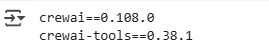

In [ ]:
# Warning control
import warnings
warnings.filterwarnings('ignore')

__TODO__ = None


- Import from the crewAI library and others

In [ ]:
import os
from google.colab import userdata
from crewai import Agent, Task, Crew, LLM

- As a LLM for your agents, you'll be using OpenAI's `gpt-3.5-turbo`.

**Optional Note:** crewAI also allow other popular models to be used as a LLM for your Agents. You can see some of the examples at the [bottom of the notebook](#1).

## Define the LLM For The Agent
In the example below, OpenAI is used. We can either
set the connection information through the environment variables,
or directly input as a parameter in the LLM class.

In [ ]:
from google.colab import userdata
#os.environ["OPENAI_API_KEY"] = userdata.get('OPENAI_API_KEY')
#os.environ["OPENAI_MODEL_NAME"] = 'gpt-3.5-turbo'

llm = LLM(model="openai/gpt-4o",  # try replace with gpt-4o-mini
          api_key=userdata.get('OPENAI_API_KEY')
)


## Creating Agents

- Define your Agents, and provide them a `role`, `goal` and `backstory`.
- It has been seen that LLMs perform better when they are role playing.

### Agent: Planner

**Note**: The benefit of using _multiple strings_ :
```Python
varname = "line 1 of text"
          "line 2 of text"
```

versus the _triple quote docstring_:
```Python
varname = """line 1 of text
             line 2 of text
          """
```
is that it can avoid adding those whitespaces and newline characters, making it better formatted to be passed to the LLM.

In [ ]:
planner = Agent(
    role="Content Planner",
    goal="Plan engaging and factually accurate content on {topic}",
    backstory="You're working on planning a blog article "
              "about the topic: {topic}."
              "You collect information that helps the "
              "audience learn something "
              "and make informed decisions. "
              "Your work is the basis for "
              "the Content Writer to write an article on this topic.",
    llm=llm,
    allow_delegation=False,
	  verbose=True
)

### Agent: Writer

In [ ]:
writer = Agent(
    role="Content Writer",
    goal="Write insightful and factually accurate "
         "opinion piece about the topic: {topic}",
    backstory="You're working on a writing "
              "a new opinion piece about the topic: {topic}. "
              "You base your writing on the work of "
              "the Content Planner, who provides an outline "
              "and relevant context about the topic. "
              "You follow the main objectives and "
              "direction of the outline, "
              "as provide by the Content Planner. "
              "You also provide objective and impartial insights "
              "and back them up with information "
              "provide by the Content Planner. "
              "You acknowledge in your opinion piece "
              "when your statements are opinions "
              "as opposed to objective statements.",
    ## TODO: Assign the language model
    llm= llm ,
    allow_delegation=False,
    verbose=True
)

### Agent: Editor

In [ ]:
editor = Agent(
    role="Editor",
    goal="Edit a given blog post to align with "
         "the writing style of the organization. ",
     ## TODO: Review and improve on the  backstory.
    backstory="You are an editor who receives a blog post "
              "from the Content Writer. "
              "Your goal is to review the blog post "
              "to ensure that it follows journalistic best practices,"
              "provides balanced viewpoints "
              "when providing opinions or assertions, "
              "and also avoids major controversial topics "
              "or opinions when possible.",
    allow_delegation=False,
    llm=llm,
    verbose=True
)

## Creating Tasks

- Define your Tasks, and provide them a `description`, `expected_output` and `agent`.

### Task: Plan

In [ ]:
plan = Task(
    description=(
        "1. Prioritize the latest trends, key players, "
            "and noteworthy news on {topic}.\n"
        "2. Identify the target audience, considering "
            "their interests and pain points.\n"
        "3. Develop a detailed content outline including "
            "an introduction, key points, and a call to action.\n"
        "4. Include SEO keywords and relevant data or sources."
    ),
    expected_output="A comprehensive content plan document "
        "with an outline, audience analysis, "
        "SEO keywords, and resources.",
    agent=planner,
)

### Task: Write

In [ ]:
write = Task(
    description=(
        "1. Use the content plan to craft a compelling "
            "blog post on {topic}.\n"
        "2. Incorporate SEO keywords naturally.\n"
		"3. Sections/Subtitles are properly named "
            "in an engaging manner.\n"
        "4. Ensure the post is structured with an "
            "engaging introduction, insightful body, "
            "and a summarizing conclusion.\n"
        "5. Proofread for grammatical errors and "
            "alignment with the brand's voice.\n"
    ),
    expected_output="A well-written blog post "
        "in markdown format, ready for publication, "
        "each section should have 2 or 3 paragraphs.",
    # TODO: assign to the suitable agent
    agent=  writer,
)

### Task: Edit

In [ ]:
edit = Task(
    description=("Proofread the given blog post for "
                 "grammatical errors and "
                 "alignment with the brand's voice."),
    expected_output="A well-written blog post in markdown format, "
                    "ready for publication, "
                    "each section should have 2 or 3 paragraphs.",
    # TODO: assign to the suitable agent
    agent=editor
)

## Creating the Crew

- Create your crew of Agents
- Pass the tasks to be performed by those agents.
    - **Note**: *For this simple example*, the tasks will be performed sequentially (i.e they are dependent on each other), so the _order_ of the task in the list _matters_.
- `verbose=True` allows you to see all the logs of the execution. Default is false

In [ ]:
# TODO: complete the agents that are assigned to the Crew
# TODO:
crew = Crew(
    agents=[planner, writer, editor],
    tasks=[plan, write, edit],
    verbose=True
)

## Running the Crew

**Note**: LLMs can provide different outputs for they same input, so what you get might be different than what you see in the video.

In [ ]:
result = crew.kickoff(inputs={"topic": "Artificial Intelligence"})

╭──────────────────────────────────────────── Crew Execution Started ─────────────────────────────────────────────╮
│                                                                                                                 │
│  Crew Execution Started                                                                                         │
│  Name: crew                                                                                                     │
│  ID: 4281e4eb-889b-4907-80cc-9869ff40c342                                                                       │
│                                                                                                                 │
│                                                                                                                 │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

🚀 Crew: crew
└── 📋 Task: 89c72a39-8342-49f2-aaa6-1d07a6a61e4d
       Status: Executing Task...

🚀 Crew: crew
└── 📋 Task: 89c72a39-8342-49f2-aaa6-1d07a6a61e4d
       Status: Executing Task...
    └── 🤖 Agent: Content Planner
            Status: In Progress

# Agent: Content Planner
## Task: 1. Prioritize the latest trends, key players, and noteworthy news on Artificial Intelligence.
2. Identify the target audience, considering their interests and pain points.
3. Develop a detailed content outline including an introduction, key points, and a call to action.
4. Include SEO keywords and relevant data or sources.


🚀 Crew: crew
└── 📋 Task: 89c72a39-8342-49f2-aaa6-1d07a6a61e4d
       Status: Executing Task...
    └── 🤖 Agent: Content Planner
            Status: In Progress
        └── 🧠 Thinking...

🚀 Crew: crew
└── 📋 Task: 89c72a39-8342-49f2-aaa6-1d07a6a61e4d
       Status: Executing Task...
    └── 🤖 Agent: Content Planner
            Status: In Progress



# Agent: Content Planner
## Final Answer: 
**Content Plan Document for Blog on Artificial Intelligence**

**1. Introduction:**

- Provide a brief explanation of Artificial Intelligence (AI).
- Highlight the significance of AI in today's digital world, its potential for growth, and its impact on various industries.

**2. Latest Trends in Artificial Intelligence:**

- Discuss advancements in AI technologies such as machine learning, deep learning, natural language processing, and computer vision.
- Analyze recent trends such as AI in healthcare for predictive diagnosis, AI-driven automation in business processes, and AI applications in enhancing cybersecurity.
- Explore the ethical considerations and challenges, including bias in AI algorithms and the need for transparency.

**3. Key Players in the AI Field:**

- Identify prominent companies spearheading the AI revolution (e.g., Google, IBM, OpenAI, Microsoft).
- Outline contributions from startups that are innovating within the AI lan

🚀 Crew: crew
└── 📋 Task: 89c72a39-8342-49f2-aaa6-1d07a6a61e4d
       Status: Executing Task...
    └── 🤖 Agent: Content Planner
            Status: ✅ Completed

🚀 Crew: crew
└── 📋 Task: 89c72a39-8342-49f2-aaa6-1d07a6a61e4d
       Assigned to: Content Planner
       Status: ✅ Completed
    └── 🤖 Agent: Content Planner
            Status: ✅ Completed

╭──────────────────────────────────────────────── Task Completion ────────────────────────────────────────────────╮
│                                                                                                                 │
│  Task Completed                                                                                                 │
│  Name: 89c72a39-8342-49f2-aaa6-1d07a6a61e4d                                                                     │
│  Agent: Content Planner                                                                                         │
│                                                                                                                 │
│                                                                                                                 │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

🚀 Crew: crew
├── 📋 Task: 89c72a39-8342-49f2-aaa6-1d07a6a61e4d
│      Assigned to: Content Planner
│      Status: ✅ Completed
│   └── 🤖 Agent: Content Planner
│           Status: ✅ Completed
└── 📋 Task: c1a0e31a-0ec0-4e43-a73c-c26f7eb612e6
       Status: Executing Task...

🚀 Crew: crew
├── 📋 Task: 89c72a39-8342-49f2-aaa6-1d07a6a61e4d
│      Assigned to: Content Planner
│      Status: ✅ Completed
│   └── 🤖 Agent: Content Planner
│           Status: ✅ Completed
└── 📋 Task: c1a0e31a-0ec0-4e43-a73c-c26f7eb612e6
       Status: Executing Task...
    └── 🤖 Agent: Content Writer
            Status: In Progress

# Agent: Content Writer
## Task: 1. Use the content plan to craft a compelling blog post on Artificial Intelligence.
2. Incorporate SEO keywords naturally.
3. Sections/Subtitles are properly named in an engaging manner.
4. Ensure the post is structured with an engaging introduction, insightful body, and a summarizing conclusion.
5. Proofread for grammatical errors and alignment with the brand's voice.



🚀 Crew: crew
├── 📋 Task: 89c72a39-8342-49f2-aaa6-1d07a6a61e4d
│      Assigned to: Content Planner
│      Status: ✅ Completed
│   └── 🤖 Agent: Content Planner
│           Status: ✅ Completed
└── 📋 Task: c1a0e31a-0ec0-4e43-a73c-c26f7eb612e6
       Status: Executing Task...
    └── 🤖 Agent: Content Writer
            Status: In Progress
        └── 🧠 Thinking...

🚀 Crew: crew
├── 📋 Task: 89c72a39-8342-49f2-aaa6-1d07a6a61e4d
│      Assigned to: Content Planner
│      Status: ✅ Completed
│   └── 🤖 Agent: Content Planner
│           Status: ✅ Completed
└── 📋 Task: c1a0e31a-0ec0-4e43-a73c-c26f7eb612e6
       Status: Executing Task...
    └── 🤖 Agent: Content Writer
            Status: In Progress



# Agent: Content Writer
## Final Answer: 
```markdown
# The Evolution and Impact of Artificial Intelligence

In today's rapidly evolving digital environment, Artificial Intelligence (AI) stands out as one of the most transformative technologies. Tracing its roots back to theoretical concepts in the mid-20th century, AI has burgeoned into a cornerstone of modern technology. From enhancing business efficiencies to personalizing consumer experiences, the significance of AI transcends across various sectors, proving not just its potential for growth, but also its profound impact on our daily lives. In this blog, we will explore recent trends and developments, highlight key players, report noteworthy news, and delve into the ethical considerations surrounding AI.

## Keeping Up with the Latest Trends in AI

Artificial Intelligence is surging forward, with new advancements that redefine what's possible. Among the most pivotal technological advances are machine learning, deep learning, natu

🚀 Crew: crew
├── 📋 Task: 89c72a39-8342-49f2-aaa6-1d07a6a61e4d
│      Assigned to: Content Planner
│      Status: ✅ Completed
│   └── 🤖 Agent: Content Planner
│           Status: ✅ Completed
└── 📋 Task: c1a0e31a-0ec0-4e43-a73c-c26f7eb612e6
       Status: Executing Task...
    └── 🤖 Agent: Content Writer
            Status: ✅ Completed

🚀 Crew: crew
├── 📋 Task: 89c72a39-8342-49f2-aaa6-1d07a6a61e4d
│      Assigned to: Content Planner
│      Status: ✅ Completed
│   └── 🤖 Agent: Content Planner
│           Status: ✅ Completed
└── 📋 Task: c1a0e31a-0ec0-4e43-a73c-c26f7eb612e6
       Assigned to: Content Writer
       Status: ✅ Completed
    └── 🤖 Agent: Content Writer
            Status: ✅ Completed

╭──────────────────────────────────────────────── Task Completion ────────────────────────────────────────────────╮
│                                                                                                                 │
│  Task Completed                                                                                                 │
│  Name: c1a0e31a-0ec0-4e43-a73c-c26f7eb612e6                                                                     │
│  Agent: Content Writer                                                                                          │
│                                                                                                                 │
│                                                                                                                 │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

🚀 Crew: crew
├── 📋 Task: 89c72a39-8342-49f2-aaa6-1d07a6a61e4d
│      Assigned to: Content Planner
│      Status: ✅ Completed
│   └── 🤖 Agent: Content Planner
│           Status: ✅ Completed
├── 📋 Task: c1a0e31a-0ec0-4e43-a73c-c26f7eb612e6
│      Assigned to: Content Writer
│      Status: ✅ Completed
│   └── 🤖 Agent: Content Writer
│           Status: ✅ Completed
└── 📋 Task: 39b1a281-8789-4bae-a64c-c3b512b3d296
       Status: Executing Task...

🚀 Crew: crew
├── 📋 Task: 89c72a39-8342-49f2-aaa6-1d07a6a61e4d
│      Assigned to: Content Planner
│      Status: ✅ Completed
│   └── 🤖 Agent: Content Planner
│           Status: ✅ Completed
├── 📋 Task: c1a0e31a-0ec0-4e43-a73c-c26f7eb612e6
│      Assigned to: Content Writer
│      Status: ✅ Completed
│   └── 🤖 Agent: Content Writer
│           Status: ✅ Completed
└── 📋 Task: 39b1a281-8789-4bae-a64c-c3b512b3d296
       Status: Executing Task...
    └── 🤖 Agent: Editor
            Status: In Progress

# Agent: Editor
## Task: Proofread the given blog post for grammatical errors and alignment with the brand's voice.


🚀 Crew: crew
├── 📋 Task: 89c72a39-8342-49f2-aaa6-1d07a6a61e4d
│      Assigned to: Content Planner
│      Status: ✅ Completed
│   └── 🤖 Agent: Content Planner
│           Status: ✅ Completed
├── 📋 Task: c1a0e31a-0ec0-4e43-a73c-c26f7eb612e6
│      Assigned to: Content Writer
│      Status: ✅ Completed
│   └── 🤖 Agent: Content Writer
│           Status: ✅ Completed
└── 📋 Task: 39b1a281-8789-4bae-a64c-c3b512b3d296
       Status: Executing Task...
    └── 🤖 Agent: Editor
            Status: In Progress
        └── 🧠 Thinking...

🚀 Crew: crew
├── 📋 Task: 89c72a39-8342-49f2-aaa6-1d07a6a61e4d
│      Assigned to: Content Planner
│      Status: ✅ Completed
│   └── 🤖 Agent: Content Planner
│           Status: ✅ Completed
├── 📋 Task: c1a0e31a-0ec0-4e43-a73c-c26f7eb612e6
│      Assigned to: Content Writer
│      Status: ✅ Completed
│   └── 🤖 Agent: Content Writer
│           Status: ✅ Completed
└── 📋 Task: 39b1a281-8789-4bae-a64c-c3b512b3d296
       Status: Executing Task...
    └── 🤖 Agent: Editor
            Status: In Progress



# Agent: Editor
## Final Answer: 
```markdown
# The Evolution and Impact of Artificial Intelligence

In today's rapidly evolving digital environment, Artificial Intelligence (AI) stands out as one of the most transformative technologies. Tracing its roots back to theoretical concepts in the mid-20th century, AI has burgeoned into a cornerstone of modern technology. From enhancing business efficiencies to personalizing consumer experiences, the significance of AI transcends various sectors, proving not just its potential for growth, but also its profound impact on our daily lives. In this blog, we will explore recent trends and developments, highlight key players, report noteworthy news, and delve into the ethical considerations surrounding AI.

## Keeping Up with the Latest Trends in AI

Artificial Intelligence is surging forward, with new advancements that redefine what's possible. Among the most pivotal technological advances are machine learning, deep learning, natural language pr

🚀 Crew: crew
├── 📋 Task: 89c72a39-8342-49f2-aaa6-1d07a6a61e4d
│      Assigned to: Content Planner
│      Status: ✅ Completed
│   └── 🤖 Agent: Content Planner
│           Status: ✅ Completed
├── 📋 Task: c1a0e31a-0ec0-4e43-a73c-c26f7eb612e6
│      Assigned to: Content Writer
│      Status: ✅ Completed
│   └── 🤖 Agent: Content Writer
│           Status: ✅ Completed
└── 📋 Task: 39b1a281-8789-4bae-a64c-c3b512b3d296
       Status: Executing Task...
    └── 🤖 Agent: Editor
            Status: ✅ Completed

🚀 Crew: crew
├── 📋 Task: 89c72a39-8342-49f2-aaa6-1d07a6a61e4d
│      Assigned to: Content Planner
│      Status: ✅ Completed
│   └── 🤖 Agent: Content Planner
│           Status: ✅ Completed
├── 📋 Task: c1a0e31a-0ec0-4e43-a73c-c26f7eb612e6
│      Assigned to: Content Writer
│      Status: ✅ Completed
│   └── 🤖 Agent: Content Writer
│           Status: ✅ Completed
└── 📋 Task: 39b1a281-8789-4bae-a64c-c3b512b3d296
       Assigned to: Editor
       Status: ✅ Completed
    └── 🤖 Agent: Editor
            Status: ✅ Completed

╭──────────────────────────────────────────────── Task Completion ────────────────────────────────────────────────╮
│                                                                                                                 │
│  Task Completed                                                                                                 │
│  Name: 39b1a281-8789-4bae-a64c-c3b512b3d296                                                                     │
│  Agent: Editor                                                                                                  │
│                                                                                                                 │
│                                                                                                                 │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭──────────────────────────────────────────────── Crew Completion ────────────────────────────────────────────────╮
│                                                                                                                 │
│  Crew Execution Completed                                                                                       │
│  Name: crew                                                                                                     │
│  ID: 4281e4eb-889b-4907-80cc-9869ff40c342                                                                       │
│                                                                                                                 │
│                                                                                                                 │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

- Display the results of your execution as markdown in the notebook.

In [ ]:
from IPython.display import Markdown
Markdown(result.raw)

```markdown
# The Evolution and Impact of Artificial Intelligence

In today's rapidly evolving digital environment, Artificial Intelligence (AI) stands out as one of the most transformative technologies. Tracing its roots back to theoretical concepts in the mid-20th century, AI has burgeoned into a cornerstone of modern technology. From enhancing business efficiencies to personalizing consumer experiences, the significance of AI transcends various sectors, proving not just its potential for growth, but also its profound impact on our daily lives. In this blog, we will explore recent trends and developments, highlight key players, report noteworthy news, and delve into the ethical considerations surrounding AI.

## Keeping Up with the Latest Trends in AI

Artificial Intelligence is surging forward, with new advancements that redefine what's possible. Among the most pivotal technological advances are machine learning, deep learning, natural language processing (NLP), and computer vision. These fields collectively contribute to building systems that simulate human cognitive functions. For instance, in healthcare, AI applications are now pivotal in predictive diagnostics, offering early detection of diseases to improve patient outcomes. In businesses, AI-driven automation enhances operational efficiencies by optimizing processes and reducing manual errors. Moreover, AI has become indispensable in cybersecurity, where it preemptively identifies threats and defends against complex cyberattacks.

Yet, as AI developments accelerate, so do the ethical debates. One pressing issue is algorithmic bias, where AI systems might inadvertently perpetuate stereotypes due to skewed training data. Such biases underline the urgency for transparency and fairness in AI. Concurrently, the need for robust regulatory frameworks to govern AI's deployment is more pressing than ever, ensuring that these powerful tools are wielded responsibly and ethically.

## Leading Voices and Innovators in the AI Revolution

A handful of tech giants and innovative startups are at the helm of the AI revolution. Companies like Google, IBM, OpenAI, and Microsoft are not only shaping the market but are also investing heavily in research and development to push the boundaries of what's achievable with AI. Their breakthroughs in artificial neural networks and cognitive services are setting the global agenda for future AI applications.

Beyond these corporate behemoths, startups are driving innovation in unprecedented ways. Many young companies focus on niche applications of AI, solving specific challenges and creating novel solutions. Influential researchers and thought leaders also play a critical role, driving academic discourse and providing insights that guide ethical and sustainable innovation in AI.

## Reporting the Latest Breakthroughs in AI 

Staying informed about AI's swift progress is essential for anyone interested in the field. Recent conferences and publications have shared breakthrough studies that illustrate AI's burgeoning capabilities. For instance, collaborative initiatives between academia and industry are increasingly leading to new AI-driven products and policy shifts. Such innovations not only highlight technological prowess but also spotlight the strategic partnerships shaping the future of AI.

In recent news, significant announcements regarding AI policy changes and collaborative efforts to standardize AI ethics are making waves. These developments are pivotal as they encourage a dialogue between stakeholders, focusing on responsible AI deployment that benefits society at large.

## Conclusion and Call to Action

As we reflect on the immense strides AI has made, it's clear that its impact across industries is both profound and inevitable. From transforming the healthcare landscape to redefining cybersecurity, AI stands as a testament to human ingenuity. However, with its potential come responsibilities, particularly in the realms of ethics and unbiased application.

For readers—be they tech-savvy professionals, budding AI enthusiasts, or seasoned business leaders—engaging with AI isn't just about keeping up with trends. It's an invitation to participate in a broader conversation about its ethical use and future implications. Stay informed, remain critically engaged, and seize opportunities to shape an equitable AI-driven future.

Use this blog as a launchpad to deepen your understanding of AI. Explore its potential and challenges, and be a part of the solution in navigating the balance between innovation and ethics.

--- 

By bridging insightful discussions with actionable insights, this post aims to keep the audience engaged and informed about the groundbreaking world of Artificial Intelligence.
```

## Discussion & Reflection ##

1. How can you use adapt or apply this crew design pattern to your unique use case ?
2. What are the limitation that you have observed?

## Try it Yourself

- Pass in a topic of your choice and see what the agents come up with!

In [ ]:
topic = "YOUR TOPIC HERE"
topic = "Mangoes"
result = crew.kickoff(inputs={"topic": topic})
Markdown(result.raw)

╭──────────────────────────────────────────── Crew Execution Started ─────────────────────────────────────────────╮
│                                                                                                                 │
│  Crew Execution Started                                                                                         │
│  Name: crew                                                                                                     │
│  ID: 4281e4eb-889b-4907-80cc-9869ff40c342                                                                       │
│                                                                                                                 │
│                                                                                                                 │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

🚀 Crew: crew
└── 📋 Task: 89c72a39-8342-49f2-aaa6-1d07a6a61e4d
       Status: Executing Task...

🚀 Crew: crew
└── 📋 Task: 89c72a39-8342-49f2-aaa6-1d07a6a61e4d
       Status: Executing Task...
    └── 🤖 Agent: Content Planner
            Status: In Progress

# Agent: Content Planner
## Task: 1. Prioritize the latest trends, key players, and noteworthy news on Mangoes.
2. Identify the target audience, considering their interests and pain points.
3. Develop a detailed content outline including an introduction, key points, and a call to action.
4. Include SEO keywords and relevant data or sources.


🚀 Crew: crew
└── 📋 Task: 89c72a39-8342-49f2-aaa6-1d07a6a61e4d
       Status: Executing Task...
    └── 🤖 Agent: Content Planner
            Status: In Progress
        └── 🧠 Thinking...

🚀 Crew: crew
└── 📋 Task: 89c72a39-8342-49f2-aaa6-1d07a6a61e4d
       Status: Executing Task...
    └── 🤖 Agent: Content Planner
            Status: In Progress



# Agent: Content Planner
## Final Answer: 
**Content Plan Document for Blog Article on Mangoes**

**1. Prioritizing Latest Trends, Key Players, and Noteworthy News on Mangoes:**

- Latest Trends: 
  - Increasing popularity of mango-flavored products (e.g., beverages, snacks).
  - Growth in agro-tourism related to mango orchards.
  - Rising interest in heirloom and exotic mango varieties.

- Key Players: 
  - Major mango-exporting countries like India, Mexico, Thailand, and the Philippines.
  - Prominent companies in the mango trade such as Del Monte, Fresh Del Monte Produce Inc., and Driscoll’s.
  - Agricultural research institutions focusing on mango cultivation and innovation.

- Noteworthy News:
  - Recent studies on the health benefits of mangoes, including their antioxidant properties and potential to aid digestion.
  - Developments in sustainability efforts in mango farming to reduce water usage and pesticide dependency.
  - Legislative changes affecting mango trade, such as ex

🚀 Crew: crew
└── 📋 Task: 89c72a39-8342-49f2-aaa6-1d07a6a61e4d
       Status: Executing Task...
    └── 🤖 Agent: Content Planner
            Status: ✅ Completed

🚀 Crew: crew
└── 📋 Task: 89c72a39-8342-49f2-aaa6-1d07a6a61e4d
       Assigned to: Content Planner
       Status: ✅ Completed
    └── 🤖 Agent: Content Planner
            Status: ✅ Completed

╭──────────────────────────────────────────────── Task Completion ────────────────────────────────────────────────╮
│                                                                                                                 │
│  Task Completed                                                                                                 │
│  Name: 89c72a39-8342-49f2-aaa6-1d07a6a61e4d                                                                     │
│  Agent: Content Planner                                                                                         │
│                                                                                                                 │
│                                                                                                                 │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

🚀 Crew: crew
├── 📋 Task: 89c72a39-8342-49f2-aaa6-1d07a6a61e4d
│      Assigned to: Content Planner
│      Status: ✅ Completed
│   └── 🤖 Agent: Content Planner
│           Status: ✅ Completed
└── 📋 Task: c1a0e31a-0ec0-4e43-a73c-c26f7eb612e6
       Status: Executing Task...

🚀 Crew: crew
├── 📋 Task: 89c72a39-8342-49f2-aaa6-1d07a6a61e4d
│      Assigned to: Content Planner
│      Status: ✅ Completed
│   └── 🤖 Agent: Content Planner
│           Status: ✅ Completed
└── 📋 Task: c1a0e31a-0ec0-4e43-a73c-c26f7eb612e6
       Status: Executing Task...
    └── 🤖 Agent: Content Writer
            Status: In Progress

# Agent: Content Writer
## Task: 1. Use the content plan to craft a compelling blog post on Mangoes.
2. Incorporate SEO keywords naturally.
3. Sections/Subtitles are properly named in an engaging manner.
4. Ensure the post is structured with an engaging introduction, insightful body, and a summarizing conclusion.
5. Proofread for grammatical errors and alignment with the brand's voice.



🚀 Crew: crew
├── 📋 Task: 89c72a39-8342-49f2-aaa6-1d07a6a61e4d
│      Assigned to: Content Planner
│      Status: ✅ Completed
│   └── 🤖 Agent: Content Planner
│           Status: ✅ Completed
└── 📋 Task: c1a0e31a-0ec0-4e43-a73c-c26f7eb612e6
       Status: Executing Task...
    └── 🤖 Agent: Content Writer
            Status: In Progress
        └── 🧠 Thinking...

🚀 Crew: crew
├── 📋 Task: 89c72a39-8342-49f2-aaa6-1d07a6a61e4d
│      Assigned to: Content Planner
│      Status: ✅ Completed
│   └── 🤖 Agent: Content Planner
│           Status: ✅ Completed
└── 📋 Task: c1a0e31a-0ec0-4e43-a73c-c26f7eb612e6
       Status: Executing Task...
    └── 🤖 Agent: Content Writer
            Status: In Progress



# Agent: Content Writer
## Final Answer: 
```markdown
# The Marvelous World of Mangoes: From Orchard to Table

## The Golden Fruit: An Introduction to Mangoes

Mangoes, often referred to as the "king of fruits," have enchanted palates across the globe with their luscious taste and vibrant colors. As a tropical delight with deep-rooted cultural significance, mangoes are enjoyed not only for their sumptuous flavor but also for their numerous health benefits. This beloved fruit has traveled far and wide, becoming an integral part of culinary traditions in various countries.

In recent years, the spotlight on mangoes has intensified, buoyed by their rising acclaim in health-conscious circles and bustling agro-tourism. Their nutritional profile, brimming with essential vitamins and antioxidants, makes mangoes more than just a sweet indulgence. As we delve deeper into the world of mangoes, we'll uncover their history, explore their benefits, and examine the trends shaping their consumption

🚀 Crew: crew
├── 📋 Task: 89c72a39-8342-49f2-aaa6-1d07a6a61e4d
│      Assigned to: Content Planner
│      Status: ✅ Completed
│   └── 🤖 Agent: Content Planner
│           Status: ✅ Completed
└── 📋 Task: c1a0e31a-0ec0-4e43-a73c-c26f7eb612e6
       Status: Executing Task...
    └── 🤖 Agent: Content Writer
            Status: ✅ Completed

🚀 Crew: crew
├── 📋 Task: 89c72a39-8342-49f2-aaa6-1d07a6a61e4d
│      Assigned to: Content Planner
│      Status: ✅ Completed
│   └── 🤖 Agent: Content Planner
│           Status: ✅ Completed
└── 📋 Task: c1a0e31a-0ec0-4e43-a73c-c26f7eb612e6
       Assigned to: Content Writer
       Status: ✅ Completed
    └── 🤖 Agent: Content Writer
            Status: ✅ Completed

╭──────────────────────────────────────────────── Task Completion ────────────────────────────────────────────────╮
│                                                                                                                 │
│  Task Completed                                                                                                 │
│  Name: c1a0e31a-0ec0-4e43-a73c-c26f7eb612e6                                                                     │
│  Agent: Content Writer                                                                                          │
│                                                                                                                 │
│                                                                                                                 │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

🚀 Crew: crew
├── 📋 Task: 89c72a39-8342-49f2-aaa6-1d07a6a61e4d
│      Assigned to: Content Planner
│      Status: ✅ Completed
│   └── 🤖 Agent: Content Planner
│           Status: ✅ Completed
├── 📋 Task: c1a0e31a-0ec0-4e43-a73c-c26f7eb612e6
│      Assigned to: Content Writer
│      Status: ✅ Completed
│   └── 🤖 Agent: Content Writer
│           Status: ✅ Completed
└── 📋 Task: 39b1a281-8789-4bae-a64c-c3b512b3d296
       Status: Executing Task...

🚀 Crew: crew
├── 📋 Task: 89c72a39-8342-49f2-aaa6-1d07a6a61e4d
│      Assigned to: Content Planner
│      Status: ✅ Completed
│   └── 🤖 Agent: Content Planner
│           Status: ✅ Completed
├── 📋 Task: c1a0e31a-0ec0-4e43-a73c-c26f7eb612e6
│      Assigned to: Content Writer
│      Status: ✅ Completed
│   └── 🤖 Agent: Content Writer
│           Status: ✅ Completed
└── 📋 Task: 39b1a281-8789-4bae-a64c-c3b512b3d296
       Status: Executing Task...
    └── 🤖 Agent: Editor
            Status: In Progress

# Agent: Editor
## Task: Proofread the given blog post for grammatical errors and alignment with the brand's voice.


🚀 Crew: crew
├── 📋 Task: 89c72a39-8342-49f2-aaa6-1d07a6a61e4d
│      Assigned to: Content Planner
│      Status: ✅ Completed
│   └── 🤖 Agent: Content Planner
│           Status: ✅ Completed
├── 📋 Task: c1a0e31a-0ec0-4e43-a73c-c26f7eb612e6
│      Assigned to: Content Writer
│      Status: ✅ Completed
│   └── 🤖 Agent: Content Writer
│           Status: ✅ Completed
└── 📋 Task: 39b1a281-8789-4bae-a64c-c3b512b3d296
       Status: Executing Task...
    └── 🤖 Agent: Editor
            Status: In Progress
        └── 🧠 Thinking...

🚀 Crew: crew
├── 📋 Task: 89c72a39-8342-49f2-aaa6-1d07a6a61e4d
│      Assigned to: Content Planner
│      Status: ✅ Completed
│   └── 🤖 Agent: Content Planner
│           Status: ✅ Completed
├── 📋 Task: c1a0e31a-0ec0-4e43-a73c-c26f7eb612e6
│      Assigned to: Content Writer
│      Status: ✅ Completed
│   └── 🤖 Agent: Content Writer
│           Status: ✅ Completed
└── 📋 Task: 39b1a281-8789-4bae-a64c-c3b512b3d296
       Status: Executing Task...
    └── 🤖 Agent: Editor
            Status: In Progress



# Agent: Editor
## Final Answer: 
```markdown
# The Marvelous World of Mangoes: From Orchard to Table

## The Golden Fruit: An Introduction to Mangoes

Mangoes, often referred to as the "king of fruits," have enchanted palates across the globe with their luscious taste and vibrant colors. As a tropical delight with deep-rooted cultural significance, mangoes are enjoyed not only for their sumptuous flavor but also for their numerous health benefits. This beloved fruit has traveled far and wide, becoming an integral part of culinary traditions in various countries.

In recent years, the spotlight on mangoes has intensified, buoyed by their rising acclaim in health-conscious circles and bustling agro-tourism. Their nutritional profile, brimming with essential vitamins and antioxidants, makes mangoes more than just a sweet indulgence. As we delve deeper into the world of mangoes, we'll uncover their history, explore their benefits, and examine the trends shaping their consumption.

## Tr

🚀 Crew: crew
├── 📋 Task: 89c72a39-8342-49f2-aaa6-1d07a6a61e4d
│      Assigned to: Content Planner
│      Status: ✅ Completed
│   └── 🤖 Agent: Content Planner
│           Status: ✅ Completed
├── 📋 Task: c1a0e31a-0ec0-4e43-a73c-c26f7eb612e6
│      Assigned to: Content Writer
│      Status: ✅ Completed
│   └── 🤖 Agent: Content Writer
│           Status: ✅ Completed
└── 📋 Task: 39b1a281-8789-4bae-a64c-c3b512b3d296
       Status: Executing Task...
    └── 🤖 Agent: Editor
            Status: ✅ Completed

🚀 Crew: crew
├── 📋 Task: 89c72a39-8342-49f2-aaa6-1d07a6a61e4d
│      Assigned to: Content Planner
│      Status: ✅ Completed
│   └── 🤖 Agent: Content Planner
│           Status: ✅ Completed
├── 📋 Task: c1a0e31a-0ec0-4e43-a73c-c26f7eb612e6
│      Assigned to: Content Writer
│      Status: ✅ Completed
│   └── 🤖 Agent: Content Writer
│           Status: ✅ Completed
└── 📋 Task: 39b1a281-8789-4bae-a64c-c3b512b3d296
       Assigned to: Editor
       Status: ✅ Completed
    └── 🤖 Agent: Editor
            Status: ✅ Completed

╭──────────────────────────────────────────────── Task Completion ────────────────────────────────────────────────╮
│                                                                                                                 │
│  Task Completed                                                                                                 │
│  Name: 39b1a281-8789-4bae-a64c-c3b512b3d296                                                                     │
│  Agent: Editor                                                                                                  │
│                                                                                                                 │
│                                                                                                                 │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭──────────────────────────────────────────────── Crew Completion ────────────────────────────────────────────────╮
│                                                                                                                 │
│  Crew Execution Completed                                                                                       │
│  Name: crew                                                                                                     │
│  ID: 4281e4eb-889b-4907-80cc-9869ff40c342                                                                       │
│                                                                                                                 │
│                                                                                                                 │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

```markdown
# The Marvelous World of Mangoes: From Orchard to Table

## The Golden Fruit: An Introduction to Mangoes

Mangoes, often referred to as the "king of fruits," have enchanted palates across the globe with their luscious taste and vibrant colors. As a tropical delight with deep-rooted cultural significance, mangoes are enjoyed not only for their sumptuous flavor but also for their numerous health benefits. This beloved fruit has traveled far and wide, becoming an integral part of culinary traditions in various countries.

In recent years, the spotlight on mangoes has intensified, buoyed by their rising acclaim in health-conscious circles and bustling agro-tourism. Their nutritional profile, brimming with essential vitamins and antioxidants, makes mangoes more than just a sweet indulgence. As we delve deeper into the world of mangoes, we'll uncover their history, explore their benefits, and examine the trends shaping their consumption.

## Tracing the Roots: Mangoes Through History

The history of mangoes is both captivating and varied, beginning more than 4,000 years ago in Eastern India. From there, traders and explorers introduced this tropical treasure to Asia, the Middle East, and eventually to the New World. Mangoes found their way into the hearts and recipes of many cultures, becoming synonymous with hospitality and celebration.

In countries like India and the Philippines, mangoes are not just food but symbols of national pride and cultural identity. Festivals are celebrated with mangoes at their center, and they are often offered as gestures of peace and friendship. Such historical and cultural significance underscores the unique place mangoes hold in societies worldwide.

## Unlocking Nutritional Powerhouse: Health Benefits of Mangoes

Among the benefits of mangoes is their rich nutritional profile, making them a preferable choice for those seeking a healthy lifestyle. Packed with vitamins A, C, and D, mangoes are excellent for boosting immunity, improving skin health, and enhancing vision. Their antioxidant properties help combat oxidative stress, potentially reducing the risk of chronic diseases.

Moreover, mangoes are a good source of dietary fiber, which aids digestion and promotes gut health. This makes them a favored option among health-conscious individuals seeking natural and wholesome dietary solutions. Including mangoes in the diet is not only a flavor-filled choice but a beneficial one too.

## Culinary Delights: Cooking with Mangoes

Mangoes are as versatile as they are delicious. From savory dishes to sweet treats, mangoes can elevate any meal. Popular recipes across different cultures include mango lassi in India, Thai mango sticky rice, and Latin America's tangy mango salsa. The possibilities are virtually endless, offering a mango-inspired dish for every occasion.

When selecting mangoes, opt for ones with a slightly soft feel and a fragrant aroma. Proper storage is essential—ripe mangoes should be consumed quickly for the best flavor, while unripe ones can ripen at room temperature. Integrating mangoes into your kitchen not only brings exotic flavor but also a delightful splash of color.

## Towards a Greener Future: Sustainability in Mango Farming

The conversation around sustainable farming is as relevant as ever in the mango industry. Methods that reduce water consumption and pesticide use are at the forefront of agricultural innovation. Such practices are vital, considering the rising effects of climate change on mango production, which could threaten future supply.

Efforts towards sustainability are championed by both farmers and industry experts who understand the importance of eco-friendly practices. Consumers are encouraged to support these initiatives by choosing organically grown mangoes and supporting brands that prioritize environmental responsibility.

## Mangoes in the Market: Trends and Innovations

The market for mangoes and mango-flavored products is experiencing an exciting surge. Mango-flavored beverages, snacks, and desserts are becoming increasingly popular, aligning with consumer tastes for exotic and refreshing products. Additionally, interest in heirloom and uncommon mango varieties is on the rise, catering to gourmet cooks and adventurous foodies.

Countries like India, Mexico, Thailand, and the Philippines dominate mango exports, supported by major companies such as Del Monte and Driscoll’s. Agricultural research institutions continue to play a pivotal role in advancing the cultivation of mangoes, ensuring that innovation keeps pace with demand.

## Pioneers of the Mango Industry: Key Players

Leading the charge in mango cultivation and trade are the countries and companies that have honed their expertise over decades. India and Mexico are noted as the largest producers and exporters, with an infrastructure that ensures quality and consistency. Companies like Fresh Del Monte Produce Inc. are major players, continually pushing the envelope with their innovative approaches.

Experts and researchers frequently collaborate to share insights, propelling the industry towards even bolder horizons. Interviews with industry insiders reveal a keen focus on sustainability, quality control, and market expansion, bridging the gap between traditional practices and modern demands.

## Calling All Mango Lovers: Get Involved

As we celebrate the many facets of mangoes, we invite you to explore their splendor in your own ways. Choose local or organic mangoes when possible, supporting both your health and sustainability efforts. Try your hand at a new mango recipe or create your personalized twist on a classic.

For more information on sustainable practices and to discover a treasure trove of mango recipes, follow the links provided. We also encourage you to share your own mango experiences and recipes—we'd love to hear from fellow mango enthusiasts.

In conclusion, whether it’s enjoying them fresh, sliced, or as part of an intricate dish, mangoes are a testament to the joys of tropical produce. They offer an unparalleled combination of flavor, nutrition, and cultural richness, promising endless enjoyment for those willing to explore their potential.
```

In [ ]:
Markdown(result.raw)

```markdown
# The Marvelous World of Mangoes: From Orchard to Table

## The Golden Fruit: An Introduction to Mangoes

Mangoes, often referred to as the "king of fruits," have enchanted palates across the globe with their luscious taste and vibrant colors. As a tropical delight with deep-rooted cultural significance, mangoes are enjoyed not only for their sumptuous flavor but also for their numerous health benefits. This beloved fruit has traveled far and wide, becoming an integral part of culinary traditions in various countries.

In recent years, the spotlight on mangoes has intensified, buoyed by their rising acclaim in health-conscious circles and bustling agro-tourism. Their nutritional profile, brimming with essential vitamins and antioxidants, makes mangoes more than just a sweet indulgence. As we delve deeper into the world of mangoes, we'll uncover their history, explore their benefits, and examine the trends shaping their consumption.

## Tracing the Roots: Mangoes Through History

The history of mangoes is both captivating and varied, beginning more than 4,000 years ago in Eastern India. From there, traders and explorers introduced this tropical treasure to Asia, the Middle East, and eventually to the New World. Mangoes found their way into the hearts and recipes of many cultures, becoming synonymous with hospitality and celebration.

In countries like India and the Philippines, mangoes are not just food but symbols of national pride and cultural identity. Festivals are celebrated with mangoes at their center, and they are often offered as gestures of peace and friendship. Such historical and cultural significance underscores the unique place mangoes hold in societies worldwide.

## Unlocking Nutritional Powerhouse: Health Benefits of Mangoes

Among the benefits of mangoes is their rich nutritional profile, making them a preferable choice for those seeking a healthy lifestyle. Packed with vitamins A, C, and D, mangoes are excellent for boosting immunity, improving skin health, and enhancing vision. Their antioxidant properties help combat oxidative stress, potentially reducing the risk of chronic diseases.

Moreover, mangoes are a good source of dietary fiber, which aids digestion and promotes gut health. This makes them a favored option among health-conscious individuals seeking natural and wholesome dietary solutions. Including mangoes in the diet is not only a flavor-filled choice but a beneficial one too.

## Culinary Delights: Cooking with Mangoes

Mangoes are as versatile as they are delicious. From savory dishes to sweet treats, mangoes can elevate any meal. Popular recipes across different cultures include mango lassi in India, Thai mango sticky rice, and Latin America's tangy mango salsa. The possibilities are virtually endless, offering a mango-inspired dish for every occasion.

When selecting mangoes, opt for ones with a slightly soft feel and a fragrant aroma. Proper storage is essential—ripe mangoes should be consumed quickly for the best flavor, while unripe ones can ripen at room temperature. Integrating mangoes into your kitchen not only brings exotic flavor but also a delightful splash of color.

## Towards a Greener Future: Sustainability in Mango Farming

The conversation around sustainable farming is as relevant as ever in the mango industry. Methods that reduce water consumption and pesticide use are at the forefront of agricultural innovation. Such practices are vital, considering the rising effects of climate change on mango production, which could threaten future supply.

Efforts towards sustainability are championed by both farmers and industry experts who understand the importance of eco-friendly practices. Consumers are encouraged to support these initiatives by choosing organically grown mangoes and supporting brands that prioritize environmental responsibility.

## Mangoes in the Market: Trends and Innovations

The market for mangoes and mango-flavored products is experiencing an exciting surge. Mango-flavored beverages, snacks, and desserts are becoming increasingly popular, aligning with consumer tastes for exotic and refreshing products. Additionally, interest in heirloom and uncommon mango varieties is on the rise, catering to gourmet cooks and adventurous foodies.

Countries like India, Mexico, Thailand, and the Philippines dominate mango exports, supported by major companies such as Del Monte and Driscoll’s. Agricultural research institutions continue to play a pivotal role in advancing the cultivation of mangoes, ensuring that innovation keeps pace with demand.

## Pioneers of the Mango Industry: Key Players

Leading the charge in mango cultivation and trade are the countries and companies that have honed their expertise over decades. India and Mexico are noted as the largest producers and exporters, with an infrastructure that ensures quality and consistency. Companies like Fresh Del Monte Produce Inc. are major players, continually pushing the envelope with their innovative approaches.

Experts and researchers frequently collaborate to share insights, propelling the industry towards even bolder horizons. Interviews with industry insiders reveal a keen focus on sustainability, quality control, and market expansion, bridging the gap between traditional practices and modern demands.

## Calling All Mango Lovers: Get Involved

As we celebrate the many facets of mangoes, we invite you to explore their splendor in your own ways. Choose local or organic mangoes when possible, supporting both your health and sustainability efforts. Try your hand at a new mango recipe or create your personalized twist on a classic.

For more information on sustainable practices and to discover a treasure trove of mango recipes, follow the links provided. We also encourage you to share your own mango experiences and recipes—we'd love to hear from fellow mango enthusiasts.

In conclusion, whether it’s enjoying them fresh, sliced, or as part of an intricate dish, mangoes are a testament to the joys of tropical produce. They offer an unparalleled combination of flavor, nutrition, and cultural richness, promising endless enjoyment for those willing to explore their potential.
```

<a name='1'></a>
 ## Other Popular Models as LLM for your Agents

###Hugging Face hosted Models
Usually, you will need the pro vesion key.

In [ ]:
from google.colab import userdata

os.environ["HUGGINGFACE_API_KEY"] = userdata.get('HF_API_TOKEN')

llm = LLM(
    #model="huggingface/meta-llama/Meta-Llama-3.1-8B-Instruct",
    #model="huggingface/meta-llama/Llama-2-7b-chat-hf",
    model="hugginface/mistralai/Mistral-7B-Instruct-v0.1",
    api_key=userdata.get('HF_API_TOKEN')
)


NameError: name 'os' is not defined

### For using Llama locally with Ollama and more, checkout the crewAI documentation on [Connecting to any LLM](https://docs.crewai.com/how-to/LLM-Connections/).